# Laboratorium 8 Page Rank
### Autor: Krzysztof Hardek

In [1]:
import networkx as nx 
import csv
import matplotlib.pyplot as plt
import numpy as np

# versions
print(nx.__version__) # 2.4
print(csv.__version__) # 1.0
print(np.__version__) # 1.18.4

2.4
1.0
1.18.4


## Zad 1 Prosty ranking wierzchołków  

### Funkcje pomocnicze:

In [2]:
# czyta graf z pliku
def read_graph(filename, delim):
    G = nx.DiGraph(name='graph')
    with open(filename, "r") as file:
        csv_reader = csv.reader(file, delimiter=delim)
        for row in csv_reader:
            s = int(row[0])
            t = int(row[1])
            G.add_edge(s, t)
        
    return G

# rysuje graf
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)

# tworzy macierz, której dominujący wektor będzie liczony    
def adj_matrix(G):
    n = len(G)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if (i, j) in G.edges:
               A[j][i] = 1/G.out_degree(i)
    
    return A

# metoda potęgowa
def power_iteration(A, i_max, e_min, x0):
    x0 = x0.copy()
    e = e_min + 1
    i = 0

    while i < i_max and e > e_min:
        tmp_x0 = x0
        x0 = np.dot(A, x0)
        x0 = x0 / np.linalg.norm(x0, ord=np.inf)
        e = np.linalg.norm(np.subtract(np.absolute(x0), np.absolute(tmp_x0)))
        i += 1
    
    return x0 / np.linalg.norm(x0, ord=1) #, l

# uproszczony algorytm page rank
def simple_page_rank(G, x0):
    A = adj_matrix(G)
    x0 = power_iteration(A, 1000, 10**-6, x0)
    return x0

### Grafy Testowe
#### Prosty graf z dołączonego artykułu

[0.39999994 0.19999997 0.4000001 ]


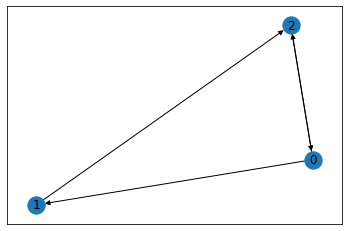

In [3]:
G = read_graph("graphs/a.csv", ",")
xg = np.ones(len(G))
print(simple_page_rank(G, xg))
draw_graph(G)

Mój wynik jest prawie taki sam jak w artykuje (różnice wynikają z użycia metody przybliżającej rozwiazanie).

#### Grafy powyżej 10 wierzchołków, silnie spójne.
Grafy stworzone zostały za pomocą funkcji gn_graph z biblioteki networkx. Zostały do tych grafów dodane ręcznie krawędzie, tak aby stały się silnie spójne  

Pierwszy Graf

True
[0.30780911 0.35004565 0.12093588 0.00729262 0.03646307 0.02917045
 0.00729262 0.11668186 0.02066242 0.00273473 0.00091158]


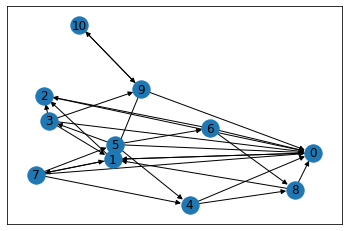

In [4]:
H = read_graph("graphs/b.csv", ",")
xh = np.ones(len(H))
print(nx.is_strongly_connected(H))
print(simple_page_rank(H, xh))
draw_graph(H)

Drugi graf

True
[0.16655564 0.01865424 0.023984   0.01199201 0.26515657 0.16922052
 0.1199201  0.023984   0.19053959 0.00333111 0.00666223]


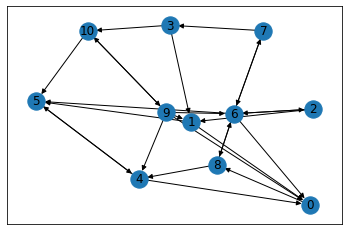

In [5]:
I = read_graph("graphs/c.csv", ",")
xi = np.ones(len(I))
print(nx.is_strongly_connected(I))
print(simple_page_rank(I, xi))
draw_graph(I)

Trzeci graf

True
[0.15017669 0.04328621 0.04946996 0.21643112 0.17226151 0.13250881
 0.07508834 0.04946996 0.04328621 0.02473499 0.04328621]


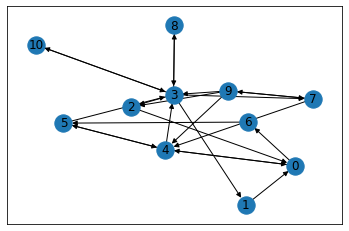

In [6]:
J = read_graph("graphs/d.csv", ",")
xj = np.ones(len(J))
print(nx.is_strongly_connected(J))
print(simple_page_rank(J, xj))
draw_graph(J)

### Wnioski

W grafach bardziej "oblegane" wierzchołki są usytuowane niżej w rankingu niż te mniej związene z grafem. Algorytm zwraca poprawne wyniki, zgodne z oczekiwaniami. Grafy muszą być silnie spójne alby nie wystąpił "rank sink" opisany w artykule. 

## Zad 2 Page Rank
### Funkcje pomocnicze

In [7]:
def page_rank(G, r0, e, d, err_min):
    err = 1
    ri_1 = r0
    I = np.identity(len(G))
    A = adj_matrix(G)
    B = d * A + np.dot(I, (1 - d) * e)
    
    while err > err_min:
        ri = ri_1 / np.linalg.norm(ri_1, ord=1)
        
        ri_1 = np.dot(B, ri)
        ri_1 = ri_1 / np.linalg.norm(ri_1, ord=1)
        
        d = np.linalg.norm(ri, ord=1) - np.linalg.norm(ri_1, ord=1)
        
        ri_1 += e * d
        err = np.linalg.norm(ri_1-ri, ord=1)
    
    return ri_1 / np.linalg.norm(ri_1, ord=1)

def plot(results, color):
    x = list(range(len(results)))
    
    plt.xlabel("Node number")
    plt.ylabel("Page rank")
    plt.plot(x, results, color=color)
    plt.show()

### Testowanie za pomocą grafów z bazy SNAP
Użyte grafy:  
    **viki-Vote**  Wikipedia who-votes-on-whom network  
    **p2p-Gnutella05**  Gnutella peer to peer network from August 5 2002  
    **p2p-Gnutella06**  Gnutella peer to peer network from August 6 2002  

In [8]:
w = read_graph("graphs/wiki-Vote.txt", "\t")
xw = np.ones(len(w))
e = np.ones(len(w))
e /= np.linalg.norm(e, ord=1)
d = 0.85
res_w = page_rank(w, xw, e, d, 10**-16)

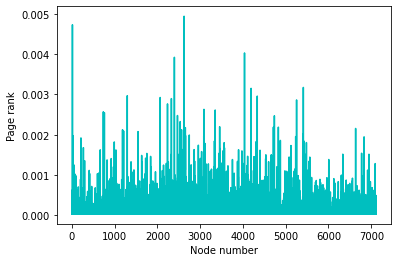

In [9]:
plot(res_w, 'c')

In [10]:
ptp1 = read_graph("graphs/p2p-Gnutella05.txt", "\t")
xptp1 = np.ones(len(ptp1))
e = np.ones(len(ptp1))
e /= np.linalg.norm(e, ord=1)
d = 0.85
res_ptp1 = page_rank(ptp1, xptp1, e, d, 10**-16)

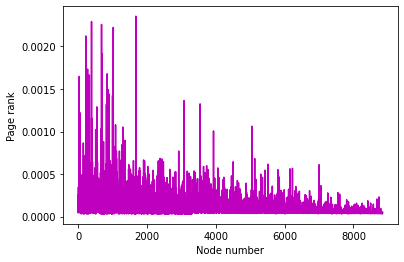

In [11]:
plot(res_ptp1, 'm')

In [12]:
ptp2 = read_graph("graphs/p2p-Gnutella06.txt", "\t")
xptp2 = np.ones(len(ptp2))
e = np.ones(len(ptp2))
e /= np.linalg.norm(e, ord=1)
d = 0.85
res_ptp2 = page_rank(ptp2, xptp2, e, d, 10**-6)

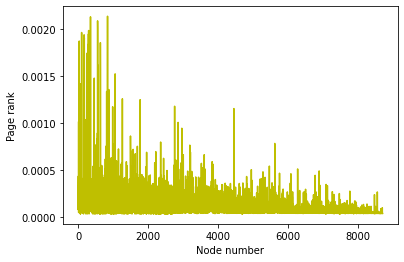

In [13]:
plot(res_ptp2, 'y')

### Badanie właściwości parametru d oraz wektora e
Użyję grafu z poprzedniego zadania, ponieważ jest prostszy i więcej na nim widać.

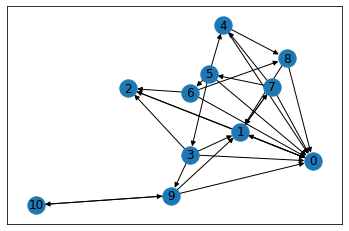

In [14]:
H = read_graph("graphs/b.csv", ",")
xh = np.ones(len(H))
e = np.ones(len(H))
e /= np.linalg.norm(e, ord=1)
draw_graph(H)

Testowanie d

In [15]:
d = 0.5
print(page_rank(H, xh, e, d, 10**-6))

[0.20277065 0.19412132 0.09307745 0.05235212 0.06207813 0.05518055
 0.05235212 0.07780808 0.06969943 0.0815191  0.05904106]


In [16]:
d = 0.6
print(page_rank(H, xh, e, d, 10**-6))

[0.22307095 0.22212577 0.09606133 0.04363593 0.05575426 0.04848197
 0.04363593 0.08078875 0.06181709 0.07355365 0.05107437]


In [17]:
d = 0.75
print(page_rank(H, xh, e, d, 10**-6))

[0.2534417  0.26716634 0.10270332 0.03013579 0.04692055 0.03951204
 0.03013579 0.08951892 0.04785644 0.05590548 0.03670364]


In [18]:
d = 0.85
print(page_rank(H, xh, e, d, 10**-6))

[0.27423257 0.29905971 0.10877054 0.0209761  0.04187974 0.03454
 0.0209761  0.09836989 0.03737846 0.03910169 0.02471518]


In [19]:
d = 0.9
print(page_rank(H, xh, e, d, 10**-6))

[0.28500218 0.31559254 0.11237334 0.01638964 0.03973761 0.03243888
 0.01638964 0.10376876 0.03188973 0.02871289 0.01770477]


Testowanie wektora e

In [20]:
d = 0.85 # optymalna wartość

e = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
e /= np.linalg.norm(e, ord=1)
print(page_rank(H, xh, e, d, 10**-6))

[0.30622991 0.34769734 0.12030532 0.00788961 0.0366313  0.02934392
 0.00788961 0.11573351 0.02140901 0.00470892 0.00216154]


### Wnioski
Skok do losowego wierzchołka pozwala rozwiązać problem "rank sink". Wraz ze wzrostem parametru d (dla wektora e złożonego z tych samych wartości oraz znormalizowanego) ważniejsze wierzchołki zyskują coraz bardziej na wartości. Utożsamić ten parametr można z prawdopodobieństwem tego, że "surfer" nie skoczy do losowego wierzchołka . Tak więc im większe jest d tym większy będzie ranking wierzchołków, które mają dużo linków do siebie. Manipulowane wartościami wektora e pozwala na faworyzowanie niektórych wierzchołków. Dzięki niemu możemy personalizowac nasz algorytm rankingujący.  